# Midterm
## Tasks
### 1. Make the truth tables of following statements
### with the help of PyDatalog:
* (A∨¬A)↔B
* A∨B
* (A→B)∧(B→A)
* (A∨(B∧¬A))∨(A∨¬(B∨A))

### 2. Calculate the measure of ρ(0.6/b1+0.4/b2+0.7/b3) of following relationship, 
### norm is operator of multiplication and conorm is max
### 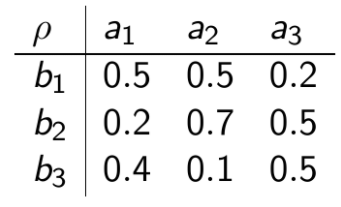

### 3 Make the PyDatalog statements of the following anecdot story of Mark Twain:
“After long years as a bachelor I was tired of being alone and married a
widow with a grown daughter. My father fell in love with the daughter
and took her as his wife. This made me my own son-in-law and my
stepdaughter became my mother. After a year my wife gave birth to a
son. Now, my son was my father’s brother-in-law and at the same time
my uncle, since he was my stepmother’s brother. But my father’s wife also
gave birth to a son. So this was my brother and also my grandson, since
he was the son of my daughter. This meant I’d married my grandmother,
since she was the mother of my mother. As my wife’s husband, I was
also her grandson. And since the husband of a grandmother is always a
grandfather, I am my own grandfather.”

### 4 Using the scikit-fuzzy solve the following control system:
The car should move at a speed of at least 60 kmh along the street away from the traffic lights. The car should stop at the intersection on a red traffic light. If the traffic light flashes amber, then the car must cross the intersection at a speed below 40 kmh. If the rules are violated, the car gets into an accident.
The traffic light mode: red, red and yellow, green, green flashing, yellow, red, etc.
Simplified mode of traffic lights: red, yellow, green, yellow, red, etc.
The traffic light may not work (off), the traffic light may flash yellow, the traffic light may be broken (all three signals are switched on simultaneously).
The signal from the system of technical vision is not always 100% reliable.
The vision system processes video images received from a television camera. The image of the traffic light is recognized during image processing. At the output of the system, a signal is generated from the distance to the traffic light and the color signal of the traffic light. The distance signal to the traffic light is measured in meters. If the traffic light is not found or the distance to it is over 140 m, then the value of this signal is 140 m.
Antecednets (Inputs) variables:
* distance to the traffic light,
* the color of the traffic light,
* speed.

The Consequents (Outputs) variable is 
* the speed change.



In [33]:
#task 1
from pyDatalog import pyDatalog

def task1(A, B):
    return (A | (not A)) == B
def task2(A, B):
    return A | B
def task3(A, B):
    return ((not A) and B) and ((not B) and A)
def task4(A, B):
    return (A or (B & (not A))) or (A or (not (B or A)))

pyDatalog.create_terms('A,B,Z,task1, task2, task3, task4')
print("task 1 \n")
print((A.in_((True, False)))
         & (B.in_((True, False)))
            & (Z == task1(A, B)))
print("\ntask 2 \n")
print((A.in_((True, False)))
         & (B.in_((True, False)))
            & (Z == task2(A, B)))
print("\ntask 3 \n")
print((A.in_((True, False)))
         & (B.in_((True, False)))
            & (Z == task3(A, B)))
print("\ntask 4 \n")
print((A.in_((True, False)))
         & (B.in_((True, False)))
            & (Z == task4(A, B)))

task 1 

A     | B     | Z    
------|-------|------
False | False | False
False | True  | True 
True  | False | False
True  | True  | True 

task 2 

A     | B     | Z    
------|-------|------
False | False | False
False | True  | True 
True  | False | True 
True  | True  | True 

task 3 

A     | B     | Z    
------|-------|------
False | False | False
False | True  | False
True  | False | False
True  | True  | False

task 4 

A     | B     | Z   
------|-------|-----
False | False | True
False | True  | True
True  | False | True
True  | True  | True


In [40]:
#task 2
t = [[0.5, 0.5, 0.2], [0.2, 0.7, 0.5], [0.4, 0.1, 0.5]]
q = [0]*3
p = [0.6, 0.4, 0.7]
#multiplying each row of t to p and finding maximum
for i in range(3):
    for j in range(3):
        q[i] = max(q[i], t[j][i] * p[i])
#to fing maximum from 3 maxes
print("The Value is", max(q))

The Value is 0.35


In [49]:
#task 3

In [50]:
#task 4
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


speed = ctrl.Antecedent(np.arange(0, 180, 1), 'speed')
color = ctrl.Antecedent(np.arange(0, 2, 1), 'color')
length = ctrl.Antecedent(np.arange(0, 140, 1), 'length')
speed_change   = ctrl.Consequent(np.arange(0, 180, 1), 'speed_change')

speed.automf(3)
color.automf(3)
length.automf(3)

speed_change['slow'] = fuzz.trimf(speed_change.universe, [0, 20, 40])
speed_change['average'] = fuzz.trimf(speed_change.universe,  [40, 60, 80])
speed_change['fast'] = fuzz.trimf(speed_change.universe, [80, 120, 180])

D:\Programs\Anaconda\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


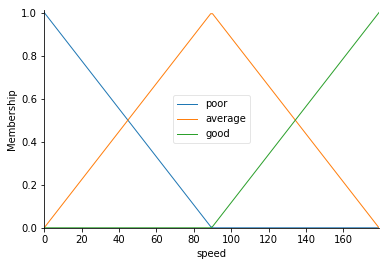

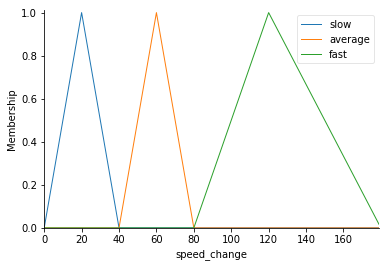

In [48]:
%matplotlib inline
speed.view()
speed_change.view()